# Student Performance Analysis

### 1. Importing Libraries

Here, we import the essential libraries for our analysis:
- **pandas (`pd`):** For data manipulation and reading CSV files.
- **numpy (`np`):** For numerical operations.
- **matplotlib.pyplot (`plt`):** For creating basic plots.
- **seaborn (`sns`):** For creating more attractive and informative statistical plots.

We also set the default plot style to `darkgrid` to make our visualizations easier to read.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

### 2. Loading the Data

We load the `StudentsPerformance.csv` dataset into a pandas DataFrame called `df`. This is the first step in any data analysis project.

In [2]:
df = pd.read_csv('/home/user/veghar/student_performance_project/StudentsPerformance.csv')

### 3. Initial Data Exploration

Let's start by getting a feel for our data.

#### Displaying the First 5 Rows

Using `df.head()`, we can see the first few rows of the dataset. This helps us understand the column names and the type of data in each column (e.g., categorical or numerical).

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Displaying the Last 5 Rows

`df.tail()` shows us the end of the dataset, which can sometimes help spot any issues with the data import.

In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


#### Statistical Summary

`df.describe()` provides a statistical summary for the numerical columns.

**Observations:**
- The `count` for all score columns is 1000, indicating no missing values.
- The `mean` (average) scores are around 66-69.
- The `min` score in math is 0, which might be an outlier or a point of interest. Reading and writing scores have higher minimums (17 and 10, respectively).

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Data Types and Non-Null Counts

`df.info()` gives us a concise summary of the DataFrame.

**Observations:**
- There are 1000 entries (rows).
- All columns have 1000 non-null values, confirming there is no missing data to handle.
- We have 5 `object` (categorical) columns and 3 `int64` (numerical) columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Checking the Shape of the Data

`df.shape` returns a tuple representing the dimensionality of the DataFrame (rows, columns).

In [7]:
df.shape

(1000, 8)

#### Checking for Missing Values

This command confirms our earlier observation from `df.info()` that there are no missing (`NaN`) values in any column.

In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Checking for Duplicate Rows

`df.duplicated().sum()` counts the number of duplicate rows. A result of 0 is good, as it means every student record is unique.

In [9]:
df.duplicated().sum()

0

### 4. Feature Engineering

Now, we will create new columns (features) from the existing data to make our analysis more insightful.

#### Calculating Total and Average Scores

We create a `total score` by summing the three subject scores and an `average score` from that total. We then round the average score and create a new `avrage score` column for simplicity. Finally, we drop the unrounded `average score` column.

In [10]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']

This calculates the average score by dividing the total score by 3.

In [11]:
df['average score'] = df['total score'] / 3

This rounds the average score to the nearest whole number.

In [12]:
df['avrage score'] =  df['average score'].round()

This drops the original, unrounded average score column.

In [13]:
df.drop(columns=['average score'],axis=1,inplace=True)

Let's check the DataFrame again to see our new columns.

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,avrage score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,73.0
1,female,group C,some college,standard,completed,69,90,88,247,82.0
2,female,group B,master's degree,standard,none,90,95,93,278,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.0
4,male,group C,some college,standard,none,76,78,75,229,76.0


#### Creating a Performance Category

To make the performance easier to analyze, we'll categorize the rounded average score into three levels: `High`, `Medium`, and `Low`.
We define a function `performace_score` that assigns these categories and then use `.apply()` to create the new `performance score` column.

In [15]:
def performace_score(avg) -> int:
    if avg > 75:
        return 'High'
    elif avg >= 50:
        return 'Medium'
    else:
        return 'Low'

df['performance score'] = df['avrage score'].apply(performace_score)

#### Checking the Distribution of Performance Scores

**Observation:**
Most students (594) fall into the `Medium` performance category. 306 are `High` performers, and 100 are `Low` performers.

In [16]:
df['performance score'].value_counts()

performance score
Medium    594
High      306
Low       100
Name: count, dtype: int64

### 5. Exploratory Data Analysis (EDA)

Let's dive deeper into the data and uncover relationships between different variables.

#### Top 5 Students by Average Score

Here we sort the DataFrame by the `avrage score` in descending order to see the top-performing students.

In [17]:
df.sort_values("avrage score", ascending=False).head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,avrage score,performance score
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.0,High
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,100.0,High
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.0,High
962,female,group E,associate's degree,standard,none,100,100,100,300,100.0,High
625,male,group D,some college,standard,completed,100,97,99,296,99.0,High


#### Gender Distribution

**Observation:**
The dataset is fairly balanced by gender, with slightly more females (518) than males (482).

In [18]:
df.groupby('gender')['performance score'].count().reset_index()

,gender,performance score
0,female,518
1,male,482


#### Average Scores by Gender

**Observation:**
- **Females** tend to have higher average scores in `reading` and `writing`.
- **Males** tend to have a higher average score in `math`.

In [19]:
df.groupby('gender')[['math score','reading score','writing score']].mean().round()

,math score,reading score,writing score
gender,,,
female,64.0,73.0,72.0
male,69.0,65.0,63.0


#### Performance Distribution by Gender

**Observation:**
Females have a higher count of `High` performers (180 vs. 126) and a lower count of `Low` performers (38 vs. 62) compared to males. This aligns with the previous finding that females have higher average reading and writing scores.

In [20]:
df.groupby('gender')['performance score'].value_counts().reset_index()

,gender,performance score,count
0,female,Medium,300
1,female,High,180
2,female,Low,38
3,male,Medium,294
4,male,High,126
5,male,Low,62


#### Impact of Test Preparation Course

Let's see how many students completed the test preparation course.

In [21]:
df.groupby('gender')['test preparation course'].value_counts().reset_index()

,gender,test preparation course,count
0,female,none,334
1,female,completed,184
2,male,none,308
3,male,completed,174


And now let's see the impact on the average score.

**Observation:**
This is a significant finding. Students who **completed** the test preparation course have an average score of **73**, while those who did not have an average score of **65**. This is a clear indicator of the course's effectiveness.

In [22]:
df.groupby('test preparation course')['avrage score'].mean().reset_index().round()

,test preparation course,avrage score
0,completed,73.0
1,none,65.0


### 6. Visualizations

#### Visualization 1: Performance Score by Test Preparation

This plot visualizes the observation from the previous step. We use `sns.countplot` with `hue` to compare the performance scores of students who completed the course versus those who did not.

**Observation from Plot:**
The blue bars (`none`) are concentrated in the `Medium` and `Low` categories, while the orange bars (`completed`) are much more prominent in the `High` performance category. This visually confirms that completing the prep course is strongly associated with higher performance.

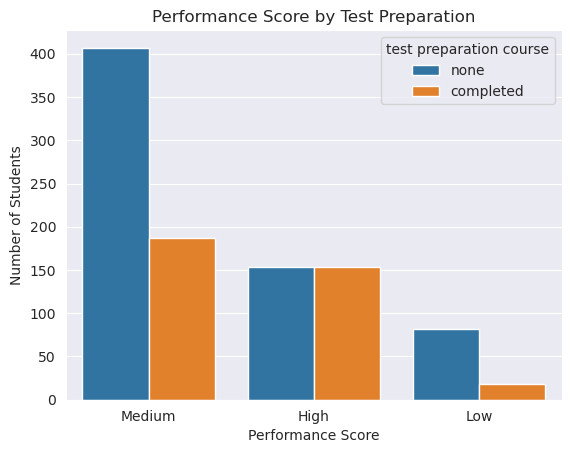

In [23]:
sns.countplot(data=df, x='performance score', hue='test preparation course')
plt.title('Performance Score by Test Preparation')
plt.xlabel('Performance Score')
plt.ylabel('Number of Students')
plt.show()

#### Visualization 2: Performance by Race/Ethnicity

This plot shows the distribution of performance scores across different racial/ethnic groups.

**Observation from Plot:**
- **Group E** has the highest proportion of `High` performers.
- **Group A** and **Group B** have a higher proportion of `Low` and `Medium` performers compared to the other groups.

<Axes: xlabel='race/ethnicity', ylabel='count'>

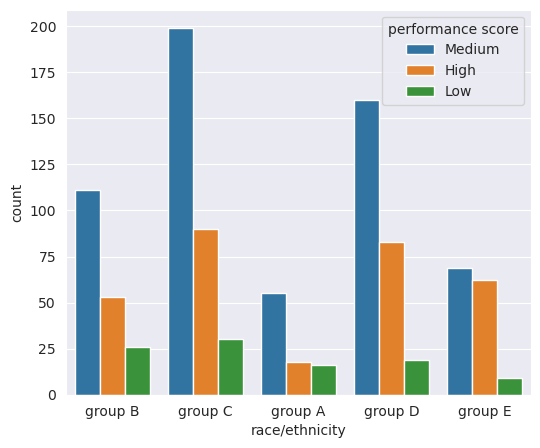

In [24]:
plt.figure(figsize=(6,5))
sns.countplot(data=df,x='race/ethnicity',hue='performance score')

#### Visualization 3: Performance by Gender

This plot shows the distribution of performance scores across gender.

**Observation from Plot:**
As noted earlier, a higher number of `High` performers are female, while a higher number of `Low` performers are male.

<Axes: xlabel='performance score', ylabel='count'>

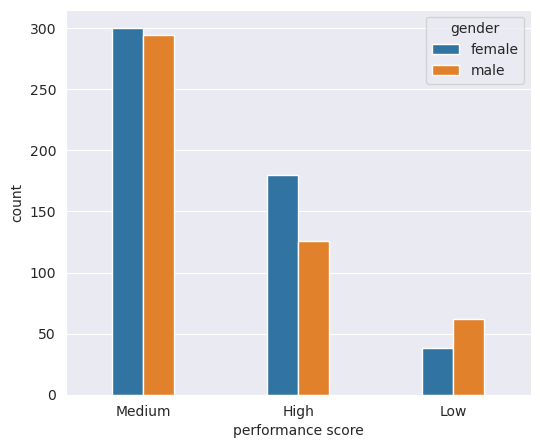

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,5))
sns.countplot(data=df,x='performance score',hue='gender',width=0.4)

This shows the columns of the dataframe.

In [26]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score', 'avrage score', 'performance score'],
      dtype='object')

This shows the value counts of the parental level of education.

In [27]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

This chart shows the relationship between parental level of education and whether the student completed the test preparation course.

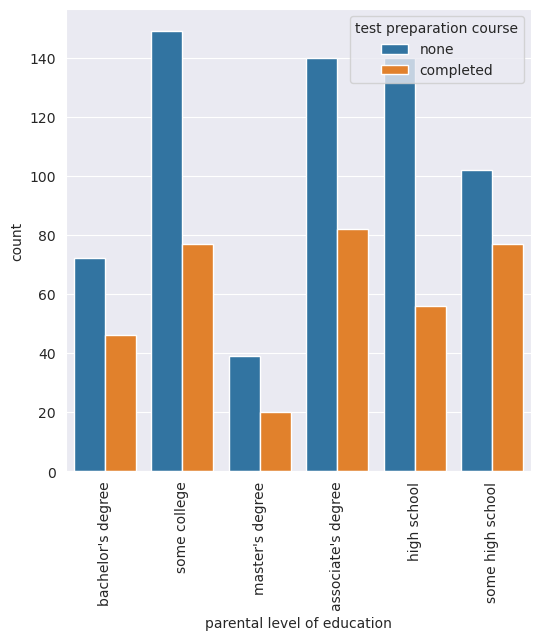

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='parental level of education',hue='test preparation course')
plt.xticks(rotation=90)
plt.show()

This shows the first 5 rows of the dataframe, which now includes the new features.

In [29]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,avrage score,performance score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,73.0,Medium
1,female,group C,some college,standard,completed,69,90,88,247,82.0,High
2,female,group B,master's degree,standard,none,90,95,93,278,93.0,High
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.0,Low
4,male,group C,some college,standard,none,76,78,75,229,76.0,High


This creates a pie chart of the performance score distribution.

In [30]:
pie_chart = df['performance score'].value_counts()

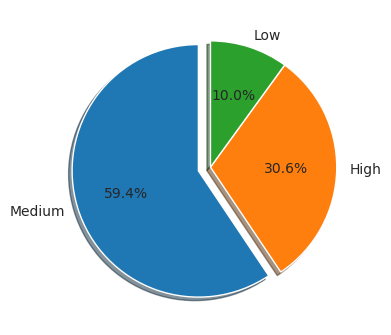

In [31]:
plt.figure(figsize=(4,4))
explode_values = [0.1 if x==pie_chart.max() else 0 for x in pie_chart]
plt.pie(pie_chart,labels=pie_chart.index,autopct='%1.1f%%',startangle=90,shadow=True,explode=explode_values)
plt.tight_layout()

### Strong Insight: The Impact of the Test Preparation Course

**Observation :**
The data clearly shows that students who completed the test preparation course performed significantly better than those who did not. The average score for students who completed the course is 73, while the average score for those who did not is 65. This is further supported by the "Performance Score by Test Preparation" visualization, which shows a much higher concentration of "High" performers among the students who completed the course.

**Importance :**
This observation is important because it provides a clear, actionable insight. The 8-point difference in the average score is substantial and can mean the difference between a student being categorized as a "Medium" performer versus a "High" performer. This suggests that the test preparation course is a highly effective intervention. Educational institutions can leverage this data to make informed decisions, such as encouraging or even requiring the test preparation course to help students improve their academic outcomes.